In [307]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

In [308]:
urlbase_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2019 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2019-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2018 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2018-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2017 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2017-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='
urlbase_half_2016 = 'https://www.runrocknroll.com/Events/Nashville/The-Races/Half-Marathon/2016-Results?gender=&agegroup=&bib=&firstname=&lastname=&page='

In [309]:
pgs_2016 = 154
pgs_2017 = 147
pgs_2018 = 85
pgs_2019 = 113

pgs_half_2016 = 898
pgs_half_2017 = 892
pgs_half_2018 = 598
pgs_half_2019 = 690

In [310]:
def marathon(url, pages):
    final_list = []
    df = pd.DataFrame()
    for p in range(1, pages + 1): # pages + 1 because range stops at the last number
        response = requests.post(url + str(p)) # Goes to URL and adds p to end of it to select page.
        soup = BeautifulSoup(response.content, 'lxml')
        tables = soup.find_all('table', attrs = {'class': 'table table-responsive table-bordered'})
        result_list = pd.read_html(str(tables[0]))
        final_list = result_list[0]
        df = df.append(final_list, ignore_index = True)
    return df


In [311]:
full_2016 = marathon(urlbase_2016, pgs_2016)
full_2016.shape

(3842, 4)

In [312]:
full_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3842 non-null   int64 
 1   Bib      3842 non-null   int64 
 2   Name     3842 non-null   object
 3   Time     3842 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.2+ KB


In [313]:
full_2016.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:25:42
1,2,3,Brian Shelton,02:34:43
2,3,1047,Christopher Capps,02:38:43
3,4,1052,Jason Grimes,02:45:06
4,5,1046,David Adams,02:47:28


converting object type time column into date time type 

In [314]:
full_2016["Time"]= pd.to_datetime(full_2016["Time"])

In [315]:
full_2016.dtypes

Overall             int64
Bib                 int64
Name               object
Time       datetime64[ns]
dtype: object

convert mapping 60 minutes into 100th- it was hard to plot date time  type - to float

In [316]:
full_2016['durationFloat'] =full_2016['Time'].dt.hour.astype(float) + round(full_2016['Time'].dt.minute/60, 2)

In [317]:
full_2016.head()

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,2020-11-23 02:25:42,2.42
1,2,3,Brian Shelton,2020-11-23 02:34:43,2.57
2,3,1047,Christopher Capps,2020-11-23 02:38:43,2.63
3,4,1052,Jason Grimes,2020-11-23 02:45:06,2.75
4,5,1046,David Adams,2020-11-23 02:47:28,2.78


In [318]:
full_2016.describe()

,Overall,Bib,durationFloat
count,3842.000000,3842.000000,3842.000000
mean,24301.906559,15431.385216,3.712980
std,41576.036228,8600.621622,2.123165
min,1.000000,1.000000,0.000000
25%,963.250000,7298.250000,3.420000
50%,1925.500000,16104.500000,4.430000
75%,2889.750000,24009.750000,5.170000
max,99999.000000,45340.000000,7.000000


In [319]:
full_2016['Time'].dt.hour.astype(float)

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3837    0.0
3838    0.0
3839    0.0
3840    0.0
3841    0.0
Name: Time, Length: 3842, dtype: float64

In [320]:
 round(full_2016['Time'].dt.minute/60,2)

0       0.42
1       0.57
2       0.63
3       0.75
4       0.78
        ... 
3837    0.00
3838    0.00
3839    0.00
3840    0.00
3841    0.00
Name: Time, Length: 3842, dtype: float64

finding all the minimum values (0's)

In [321]:
slowest = full_2016.loc[full_2016["durationFloat"] == full_2016["durationFloat"].min()]

In [322]:
slowest

,Overall,Bib,Name,Time,durationFloat
2952,99999,27326,Ashley Newton,2020-11-23,0.0
2953,99999,2031,Thomas Sirna,2020-11-23,0.0
2954,99999,4027,Sulaiman Seriki,2020-11-23,0.0
2955,99999,17252,Carol Mulderink,2020-11-23,0.0
2956,99999,27291,Mark Warf,2020-11-23,0.0
...,...,...,...,...,...
3837,99999,21159,Beth Lyons,2020-11-23,0.0
3838,99999,25061,Aleksei Stevens,2020-11-23,0.0
3839,99999,6047,Lizzie Ziccardi,2020-11-23,0.0
3840,99999,2052,Adam Pastors,2020-11-23,0.0


In [323]:
full_2016.dtypes

Overall                   int64
Bib                       int64
Name                     object
Time             datetime64[ns]
durationFloat           float64
dtype: object

eliminated the 0 values and saved it inside the new table-assuming the people did not run

In [324]:
final_2016_full = full_2016.drop(slowest.index)

In [325]:
winner = final_2016_full.loc[final_2016_full["Time"]==final_2016_full["Time"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
3390,99999,4109,Bruce Kesselring,2020-11-23 02:24:09,2.4


In [326]:
full_2016["durationFloat"].max()

7.0

In [327]:
import seaborn as sns

making a scatter plot to determine any corelations 

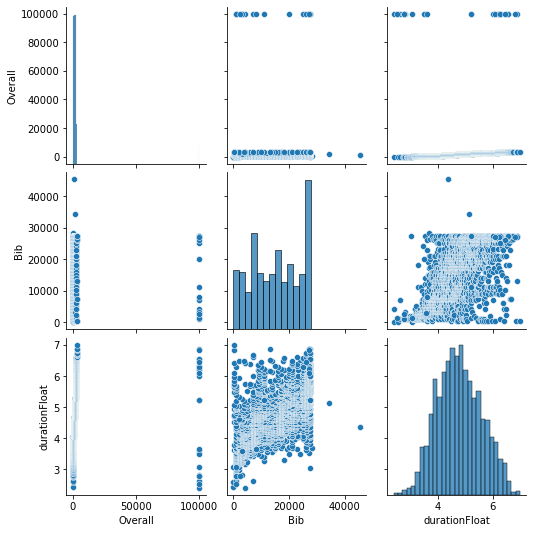

In [328]:
sns.pairplot(final_2016_full)

to see any corelation between Bib and DurationFloat

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='durationFloat'>

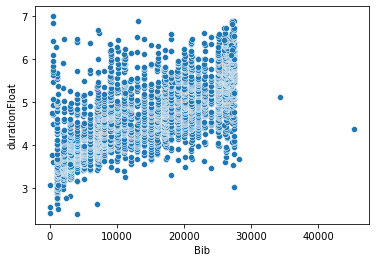

In [329]:
sns.scatterplot("Bib","durationFloat",data=final_2016_full)

this contains all the people who didnt run and the duration was zero

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

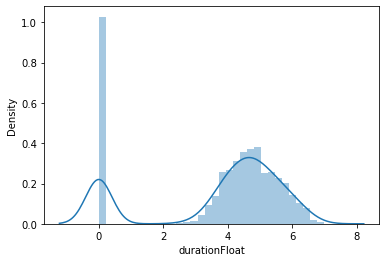

In [330]:
sns.distplot(full_2016["durationFloat"])

after droppping th zero duration 

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

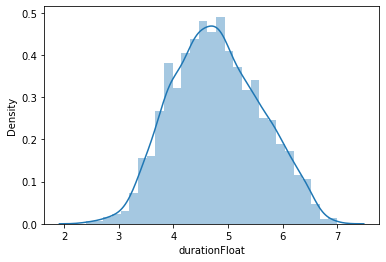

In [331]:
sns.distplot(final_2016_full["durationFloat"])

In [332]:
final_2016_full.describe()

,Overall,Bib,durationFloat
count,2978.000000,2978.000000,2978.000000
mean,2340.090329,15304.475151,4.790218
std,9206.123668,8531.566665,0.808810
min,1.000000,1.000000,2.400000
25%,747.250000,7297.250000,4.200000
50%,1492.500000,16069.500000,4.750000
75%,2239.750000,23058.750000,5.370000
max,99999.000000,45340.000000,7.000000


<AxesSubplot:xlabel='durationFloat'>

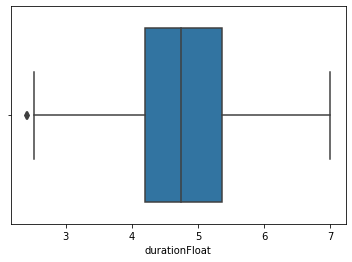

In [333]:
sns.boxplot(x="durationFloat",data=final_2016_full)

unfiltered data- data represents a lot of outliers including the people who did run



<AxesSubplot:xlabel='durationFloat'>

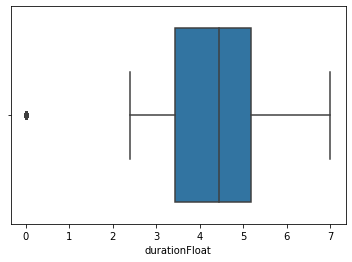

In [334]:
sns.boxplot(x="durationFloat",data=full_2016)

In [335]:
# How many people lie in each bib
final_2016_full.groupby("Bib").count()

,Overall,Name,Time,durationFloat
Bib,,,,
1,1,1,1,1
3,1,1,1,1
101,1,1,1,1
402,1,1,1,1
404,1,1,1,1
...,...,...,...,...
27453,1,1,1,1
27454,1,1,1,1
28142,1,1,1,1


In [336]:
## 2017 FULL-MARATHON

In [337]:

full_2017 = marathon(urlbase_2017, pgs_2017)
full_2017.shape

(3651, 4)

In [338]:
full_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3651 non-null   int64 
 1   Bib      3651 non-null   int64 
 2   Name     3651 non-null   object
 3   Time     3651 non-null   object
dtypes: int64(2), object(2)
memory usage: 114.2+ KB


In [339]:
full_2017.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25
1,2,1145,Ryan Regnier,02:56:28
2,3,1147,Daniel Everett,03:00:55
3,4,1029,Khris Vickroy,03:04:47
4,5,1119,Marcus Dilallo,03:04:53


In [340]:
full_2017["Time"]= pd.to_datetime(full_2017["Time"])

In [341]:
full_2017['durationFloat'] =full_2017['Time'].dt.hour.astype(float) + round(full_2017['Time'].dt.minute/60, 2)

In [342]:
slowest_2017 = full_2017.loc[full_2017["durationFloat"] == full_2017["durationFloat"].min()]

In [343]:
slowest_2017

,Overall,Bib,Name,Time,durationFloat
2466,99999,21123,Samantha Miller,2020-11-23,0.0
2467,99999,27332,Tiffany Dupont,2020-11-23,0.0
2468,99999,19141,Stacey Lewis,2020-11-23,0.0
2470,99999,26267,Cliff Boyd,2020-11-23,0.0
2471,99999,26201,Patty Singley,2020-11-23,0.0
...,...,...,...,...,...
3646,99999,1185,Ernest Lee,2020-11-23,0.0
3647,99999,8038,Allison Alfonso,2020-11-23,0.0
3648,99999,26069,Justin Wehring,2020-11-23,0.0
3649,99999,8111,Timothy Forbes,2020-11-23,0.0


In [344]:
final_2017_full = full_2017.drop(slowest_2017.index)

In [346]:
winner = final_2017_full.loc[final_2017_full["durationFloat"]==final_2017_full["durationFloat"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
3404,99999,27024,James Cook,2020-11-23 01:26:11,1.43


In [347]:
full_2017["durationFloat"].max()

6.63

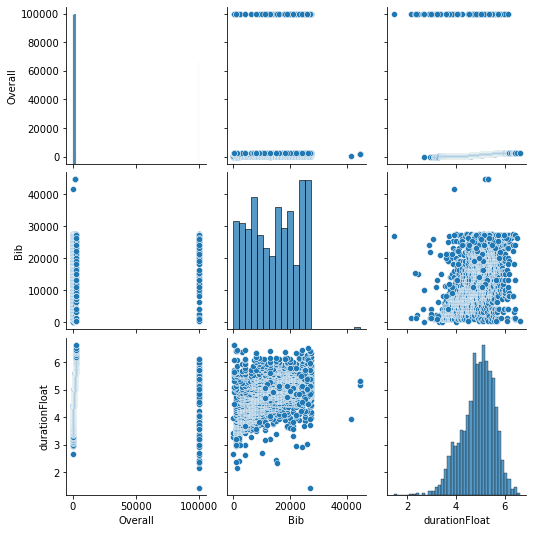

In [348]:
sns.pairplot(final_2017_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='durationFloat'>

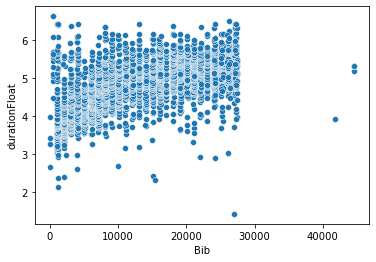

In [350]:
sns.scatterplot("Bib","durationFloat",data=final_2017_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='durationFloat'>

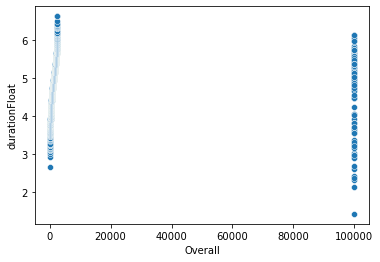

In [351]:
sns.scatterplot("Overall","durationFloat",data=final_2017_full)

In [289]:
# How many people lie in each bib
final_2017_full.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
101,1,1,1
102,1,1,1
103,1,1,1
403,1,1,1
...,...,...,...
41685,1,1,1
44559,1,1,1
44560,1,1,1


In [352]:
final_2017_full.describe()

,Overall,Bib,durationFloat
count,2595.000000,2595.000000,2595.000000
mean,6143.230058,14502.085164,4.888408
std,21481.757258,8403.911601,0.671667
min,1.000000,1.000000,1.430000
25%,649.500000,7104.500000,4.470000
50%,1298.000000,15017.000000,4.970000
75%,1946.500000,22055.500000,5.370000
max,99999.000000,44562.000000,6.630000


In [290]:
final_2017_full.loc[final_2017_full["Bib"] == 1]

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:40:25


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

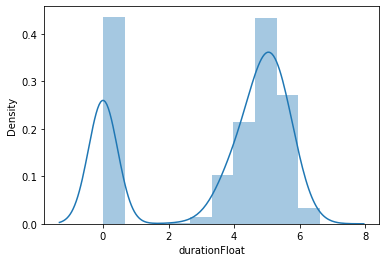

In [353]:
sns.distplot(full_2017["durationFloat"])

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

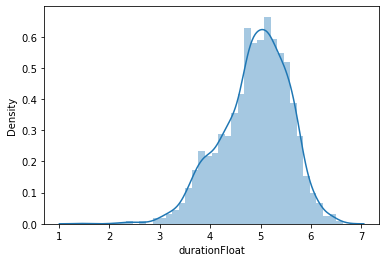

In [356]:
sns.distplot(final_2017_full["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

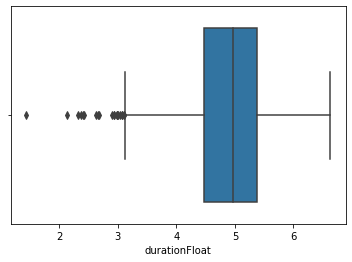

In [357]:
sns.boxplot(x="durationFloat",data=final_2017_full)

<AxesSubplot:xlabel='durationFloat'>

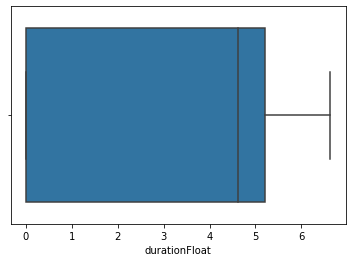

In [358]:
sns.boxplot(x="durationFloat",data=full_2017)

 2018 FULL-MARATHON

In [359]:
full_2018 = marathon(urlbase_2018, pgs_2018)
full_2018.shape

(2115, 4)

In [293]:
full_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2115 non-null   int64 
 1   Bib      2115 non-null   int64 
 2   Name     2115 non-null   object
 3   Time     2115 non-null   object
dtypes: int64(2), object(2)
memory usage: 66.2+ KB


In [360]:
full_2018["Time"]= pd.to_datetime(full_2018["Time"]) 

In [363]:
full_2018['durationFloat'] =full_2018['Time'].dt.hour.astype(float) + round(full_2018['Time'].dt.minute/60, 2)

In [364]:
full_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Overall        2115 non-null   int64         
 1   Bib            2115 non-null   int64         
 2   Name           2115 non-null   object        
 3   Time           2115 non-null   datetime64[ns]
 4   durationFloat  2115 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 82.7+ KB


In [43]:
full_2018.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,2020-11-22 02:28:16
1,2,3,Garang Madut,2020-11-22 02:29:52
2,3,33442,Kevin Fink,2020-11-22 02:38:59
3,4,33441,Andrew Hodges,2020-11-22 02:43:59
4,5,30028,Nicholas Aubert,2020-11-22 02:48:11


In [365]:
slowest_2018 = full_2018.loc[full_2017["durationFloat"] == full_2018["durationFloat"].min()]

In [366]:
final_2018_full = full_2018.drop(slowest_2018.index)

In [367]:
winner = final_2018_full.loc[final_2018_full["durationFloat"]==final_2018_full["durationFloat"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,2020-11-23 02:28:16,2.47


In [368]:
full_2018["durationFloat"].max()

6.9

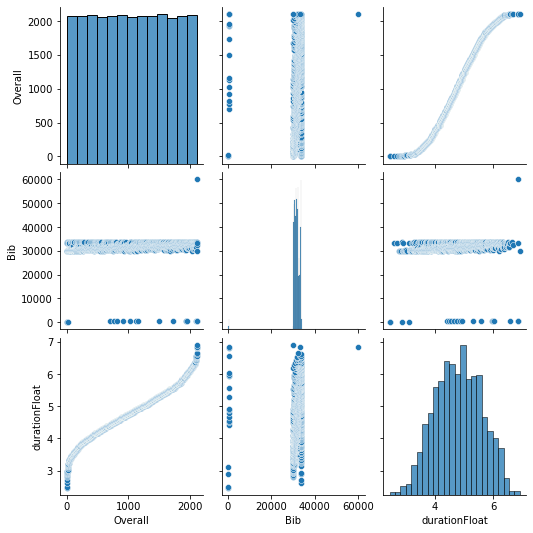

In [369]:
sns.pairplot(final_2018_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='Time'>

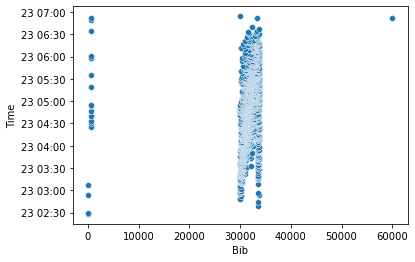

In [370]:
sns.scatterplot("Bib","Time",data=final_2018_full)

In [371]:
final_2018_full.describe()

,Overall,Bib,durationFloat
count,2107.000000,2107.000000,2107.000000
mean,1053.838633,31513.429995,4.804860
std,608.355977,3214.679875,0.793684
min,1.000000,1.000000,2.470000
25%,527.500000,30844.000000,4.200000
50%,1054.000000,31658.000000,4.800000
75%,1580.500000,32661.000000,5.400000
max,2107.000000,60042.000000,6.900000


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

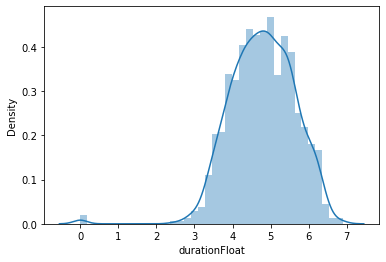

In [372]:
sns.distplot(full_2018["durationFloat"])

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

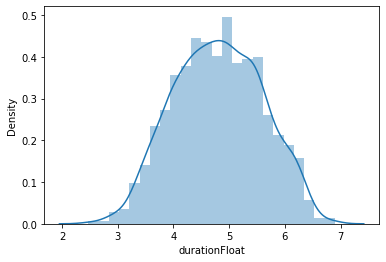

In [373]:
sns.distplot(final_2018_full["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

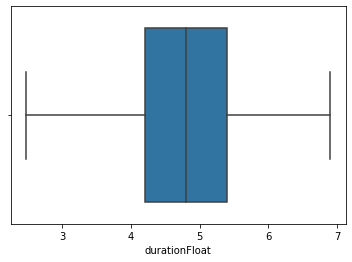

In [374]:
sns.boxplot(x="durationFloat",data=final_2018_full)

<AxesSubplot:xlabel='durationFloat'>

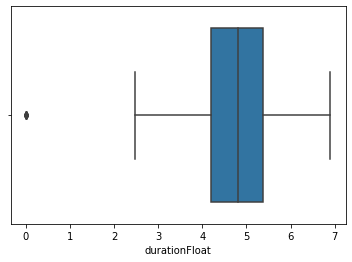

In [375]:
sns.boxplot(x="durationFloat",data=full_2018)

In [62]:
# How many people lie in each bib
final_2018_full.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
3,1,1,1
10,1,1,1
11,1,1,1
517,1,1,1
...,...,...,...
33717,1,1,1
33718,1,1,1
33719,1,1,1


In [63]:
final_2018_full.loc[final_2018_full["Bib"] == 1]

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16


In [386]:
full_2019 = marathon(urlbase_2019, pgs_2019)
full_2019.shape

(2811, 4)

In [387]:
full_2019["Time"]= pd.to_datetime(full_2019["Time"])

In [388]:
full_2019['durationFloat'] =full_2019['Time'].dt.hour.astype(float) + round(full_2019['Time'].dt.minute/60, 2)

In [389]:
slowest_2019 = full_2019.loc[full_2019["durationFloat"] == full_2019["durationFloat"].min()]
final_2019_full = full_2019.drop(slowest_2019.index)

In [390]:
winner = final_2019_full.loc[final_2019_full["durationFloat"]==final_2019_full["durationFloat"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
0,1,30001,Travis Peruski,2020-11-23 01:37:54,1.62


In [391]:
full_2019["durationFloat"].max()

6.72

In [385]:
full_2019.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Overall        2811 non-null   int64         
 1   Bib            2811 non-null   int64         
 2   Name           2811 non-null   object        
 3   Time           2811 non-null   datetime64[ns]
 4   durationFloat  2811 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 109.9+ KB


In [392]:
full_2019.head()

,Overall,Bib,Name,Time,durationFloat
0,1,30001,Travis Peruski,2020-11-23 01:37:54,1.62
1,2,1,Scott Wietecha,2020-11-23 02:34:59,2.57
2,3,4,Jordan Wilson,2020-11-23 02:35:24,2.58
3,4,30034,Steelton Flynn,2020-11-23 02:39:59,2.65
4,5,30035,Thomas Ellis,2020-11-23 02:42:09,2.70


In [69]:
full_2019["Time"]= pd.to_datetime(full_2019["Time"]) 

In [70]:
full_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Overall  2811 non-null   int64         
 1   Bib      2811 non-null   int64         
 2   Name     2811 non-null   object        
 3   Time     2811 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 88.0+ KB


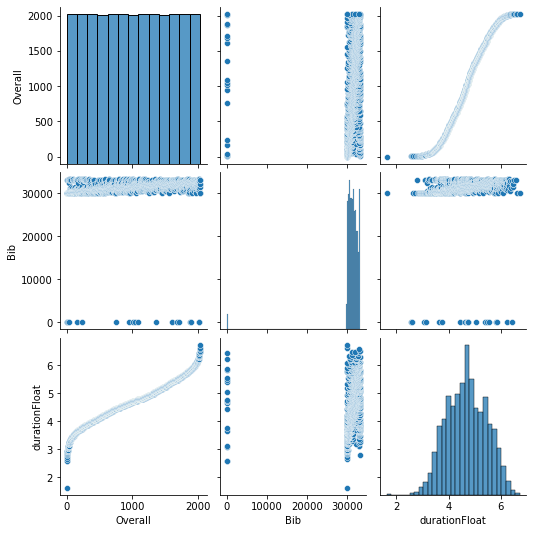

In [393]:
sns.pairplot(final_2019_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='durationFloat'>

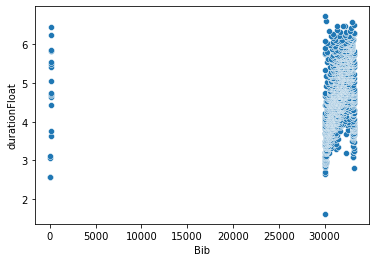

In [395]:
sns.scatterplot("Bib","durationFloat",data=final_2019_full)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='durationFloat'>

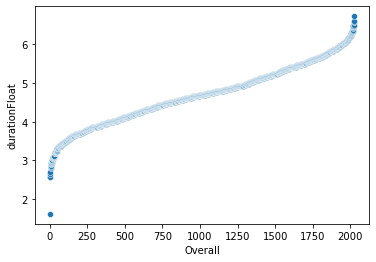

In [396]:
sns.scatterplot("Overall","durationFloat",data=final_2019_full)

In [397]:
final_2019_full.describe()

,Overall,Bib,durationFloat
count,2025.000000,2025.000000,2025.000000
mean,1013.000000,31239.138765,4.692889
std,584.711467,3166.606555,0.757886
min,1.000000,1.000000,1.620000
25%,507.000000,30722.000000,4.120000
50%,1013.000000,31470.000000,4.680000
75%,1519.000000,32256.000000,5.250000
max,2025.000000,33218.000000,6.720000


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

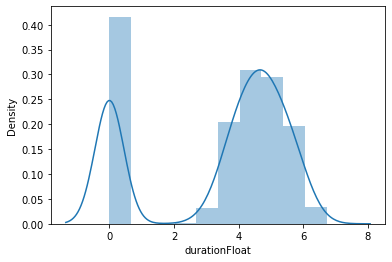

In [398]:
sns.distplot(full_2019["durationFloat"])

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

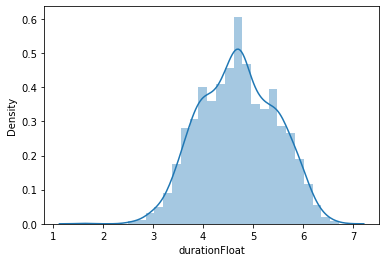

In [399]:
sns.distplot(final_2019_full["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

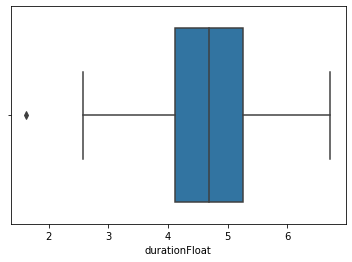

In [402]:
sns.boxplot(x="durationFloat",data=final_2019_full)

<AxesSubplot:xlabel='durationFloat'>

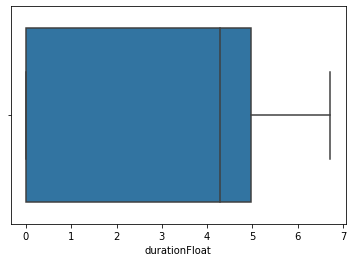

In [401]:
sns.boxplot(x="durationFloat",data=full_2019)

In [87]:
# How many people lie in each bib
final_2019_full.groupby("Bib").count()

,Overall,Name,Time
Bib,,,
1,1,1,1
2,1,1,1
4,1,1,1
7,1,1,1
101,1,1,1
...,...,...,...
33213,1,1,1
33215,1,1,1
33216,1,1,1


In [88]:
final_2019_full.loc[final_2019_full["Bib"] == 1]

,Overall,Bib,Name,Time
1,2,1,Scott Wietecha,02:34:59


In [ ]:
## half_marathon_2016

In [403]:
half_2016 = marathon(urlbase_2016, pgs_2016)
half_2016.shape

(3842, 4)

In [404]:
half_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3842 non-null   int64 
 1   Bib      3842 non-null   int64 
 2   Name     3842 non-null   object
 3   Time     3842 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.2+ KB


In [413]:
half_2016["Time"]= pd.to_datetime(half_2016["Time"]) 

In [414]:
half_2016['durationFloat'] =half_2016['Time'].dt.hour.astype(float) + round(half_2016['Time'].dt.minute/60, 2)

In [415]:
slowest_2016 = half_2016.loc[half_2016["durationFloat"] == half_2016["durationFloat"].min()]

final_2016_half = half_2016.drop(slowest_2016.index)

In [416]:
half_2016.head()

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,2020-11-23 02:25:42,2.42
1,2,3,Brian Shelton,2020-11-23 02:34:43,2.57
2,3,1047,Christopher Capps,2020-11-23 02:38:43,2.63
3,4,1052,Jason Grimes,2020-11-23 02:45:06,2.75
4,5,1046,David Adams,2020-11-23 02:47:28,2.78


In [417]:
half_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Overall        3842 non-null   int64         
 1   Bib            3842 non-null   int64         
 2   Name           3842 non-null   object        
 3   Time           3842 non-null   datetime64[ns]
 4   durationFloat  3842 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 150.2+ KB


In [418]:
half_2016.head()

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,2020-11-23 02:25:42,2.42
1,2,3,Brian Shelton,2020-11-23 02:34:43,2.57
2,3,1047,Christopher Capps,2020-11-23 02:38:43,2.63
3,4,1052,Jason Grimes,2020-11-23 02:45:06,2.75
4,5,1046,David Adams,2020-11-23 02:47:28,2.78


In [419]:
slowest = half_2016.loc[half_2016["Time"] == half_2016["Time"].min()]

In [421]:
slowest

,Overall,Bib,Name,Time,durationFloat
2952,99999,27326,Ashley Newton,2020-11-23,0.0
2953,99999,2031,Thomas Sirna,2020-11-23,0.0
2954,99999,4027,Sulaiman Seriki,2020-11-23,0.0
2955,99999,17252,Carol Mulderink,2020-11-23,0.0
2956,99999,27291,Mark Warf,2020-11-23,0.0
...,...,...,...,...,...
3837,99999,6047,Lizzie Ziccardi,2020-11-23,0.0
3838,99999,2052,Adam Pastors,2020-11-23,0.0
3839,99999,4007,Andy Brooks,2020-11-23,0.0
3840,99999,2107,Anastasiya Christiansen,2020-11-23,0.0


In [422]:
half_2016_half = half_2016.drop(slowest.index)

In [423]:
winner = final_2016_half.loc[final_2016_half["Time"]==final_2016_half["Time"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
3267,99999,4109,Bruce Kesselring,2020-11-23 02:24:09,2.4


In [424]:
half_2019["Time"].max()

Timestamp('2020-11-22 06:43:55')

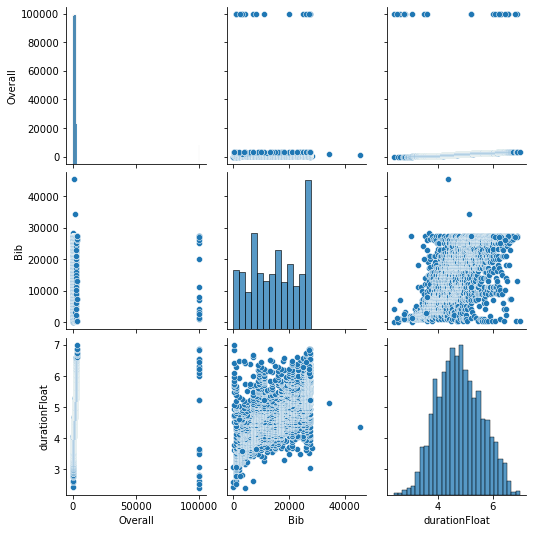

In [425]:
sns.pairplot(final_2016_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='durationFloat'>

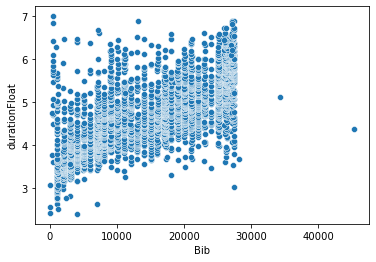

In [430]:
sns.scatterplot("Bib","durationFloat",data=final_2016_half)

In [431]:
final_2016_half.describe()

,Overall,Bib,durationFloat
count,2978.000000,2978.000000,2978.000000
mean,2340.090329,15304.475151,4.790218
std,9206.123668,8531.566665,0.808810
min,1.000000,1.000000,2.400000
25%,747.250000,7297.250000,4.200000
50%,1492.500000,16069.500000,4.750000
75%,2239.750000,23058.750000,5.370000
max,99999.000000,45340.000000,7.000000


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

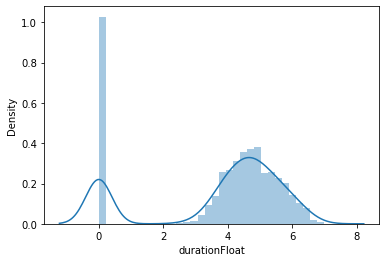

In [433]:
sns.distplot(half_2016["durationFloat"])

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

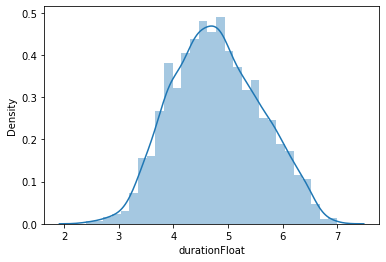

In [434]:
sns.distplot(final_2016_half["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

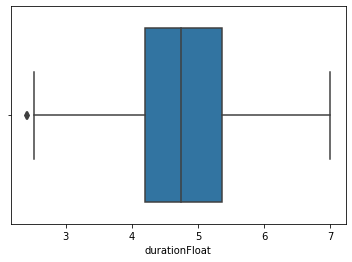

In [435]:
sns.boxplot(x="durationFloat",data=final_2016_half)

<AxesSubplot:xlabel='durationFloat'>

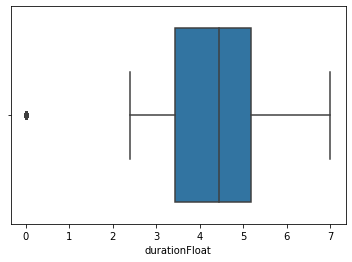

In [436]:
sns.boxplot(x="durationFloat",data=half_2016)

In [437]:
# How many people lie in each bib
final_2016_half.groupby("Bib").count()

,Overall,Name,Time,durationFloat
Bib,,,,
1,1,1,1,1
3,1,1,1,1
101,1,1,1,1
402,1,1,1,1
404,1,1,1,1
...,...,...,...,...
27453,1,1,1,1
27454,1,1,1,1
28142,1,1,1,1


In [438]:
final_2016_half.loc[final_2016_half["Bib"] == 1]

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,02:25:42,2.42


In [ ]:
## 2017 HALF-MARATHON

In [439]:
half_2017 = marathon(urlbase_2017, pgs_2017)
half_2017.shape

(3651, 4)

In [107]:
half_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  3651 non-null   int64 
 1   Bib      3651 non-null   int64 
 2   Name     3651 non-null   object
 3   Time     3651 non-null   object
dtypes: int64(2), object(2)
memory usage: 114.2+ KB


In [440]:
half_2017["Time"]= pd.to_datetime(half_2017["Time"])

In [442]:
half_2017['durationFloat'] =half_2017['Time'].dt.hour.astype(float) + round(half_2017['Time'].dt.minute/60, 2)

In [443]:
slowest_2017 = half_2017.loc[half_2017["durationFloat"] == half_2017["durationFloat"].min()]

In [444]:
final_2017_half = half_2017.drop(slowest_2017.index)

In [447]:
winner = final_2017_half.loc[final_2017_half["durationFloat"]==final_2017_half["durationFloat"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
3404,99999,27024,James Cook,2020-11-24 01:26:11,1.43


In [449]:
half_2017["durationFloat"].max()

6.63

In [450]:
half_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Overall        3651 non-null   int64         
 1   Bib            3651 non-null   int64         
 2   Name           3651 non-null   object        
 3   Time           3651 non-null   datetime64[ns]
 4   durationFloat  3651 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 142.7+ KB


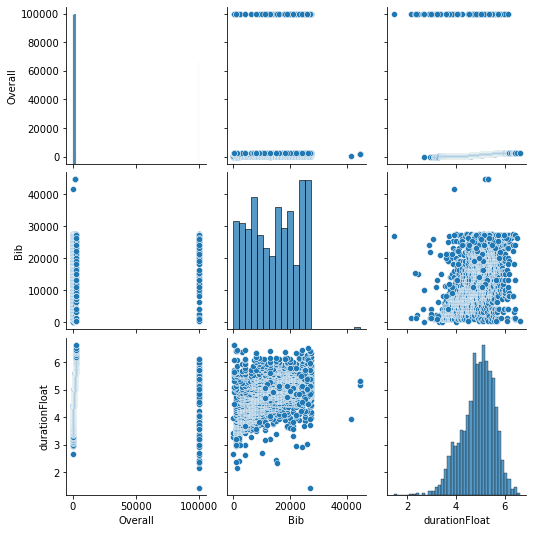

In [452]:
sns.pairplot(final_2017_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='Time'>

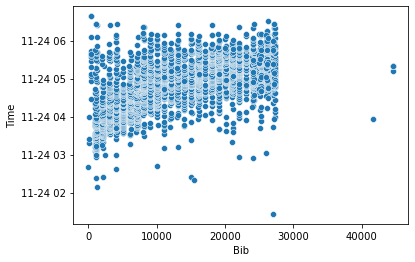

In [453]:
sns.scatterplot("Bib","Time",data=final_2017_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='Overall'>

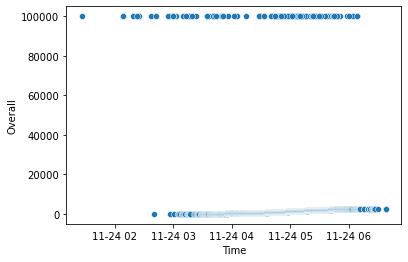

In [454]:
sns.scatterplot("Time","Overall",data=final_2017_half)

In [455]:
final_2017_half.describe()

,Overall,Bib,durationFloat
count,2595.000000,2595.000000,2595.000000
mean,6143.230058,14502.085164,4.888408
std,21481.757258,8403.911601,0.671667
min,1.000000,1.000000,1.430000
25%,649.500000,7104.500000,4.470000
50%,1298.000000,15017.000000,4.970000
75%,1946.500000,22055.500000,5.370000
max,99999.000000,44562.000000,6.630000


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

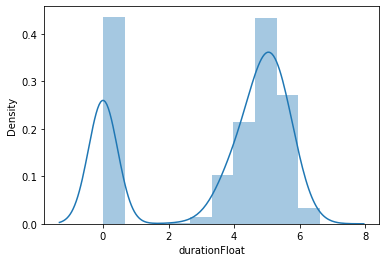

In [456]:
sns.distplot(half_2017["durationFloat"])

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

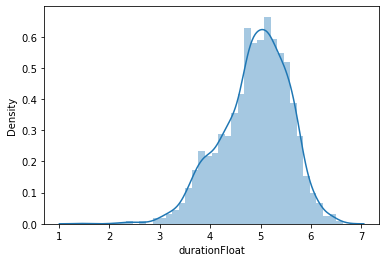

In [458]:
sns.distplot(final_2017_half["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

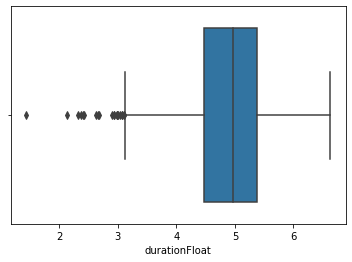

In [459]:
sns.boxplot(x="durationFloat",data=final_2017_half)

<AxesSubplot:xlabel='durationFloat'>

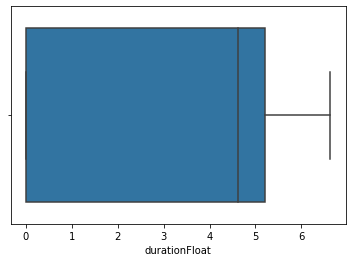

In [460]:
sns.boxplot(x="durationFloat",data=half_2017)

In [461]:
final_2017_half.loc[final_2017_half["Bib"] == 1]

,Overall,Bib,Name,Time,durationFloat
0,1,1,Scott Wietecha,2020-11-24 02:40:25,2.67


In [131]:
##2018 Half_Marathon

In [462]:
half_2018 = marathon(urlbase_2018, pgs_2018)
half_2018.shape

(2115, 4)

In [463]:
half_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2115 non-null   int64 
 1   Bib      2115 non-null   int64 
 2   Name     2115 non-null   object
 3   Time     2115 non-null   object
dtypes: int64(2), object(2)
memory usage: 66.2+ KB


In [464]:
half_2018.head()

,Overall,Bib,Name,Time
0,1,1,Scott Wietecha,02:28:16
1,2,3,Garang Madut,02:29:52
2,3,33442,Kevin Fink,02:38:59
3,4,33441,Andrew Hodges,02:43:59
4,5,30028,Nicholas Aubert,02:48:11


In [465]:
half_2018["Time"]= pd.to_datetime(half_2018["Time"])

In [466]:
half_2018['durationFloat'] =half_2018['Time'].dt.hour.astype(float) + round(half_2018['Time'].dt.minute/60, 2)

In [467]:
slowest_2018 = half_2018.loc[half_2018["durationFloat"] == half_2018["durationFloat"].min()]

In [473]:
slowest_2018

,Overall,Bib,Name,Time,durationFloat
2107,99999,33530,Brandon Wynsma,2020-11-24,0.0
2108,99999,32166,Janna Chew,2020-11-24,0.0
2109,99999,31683,Aubrey Spaeth,2020-11-24,0.0
2110,99999,33654,Jeff Ekkart,2020-11-24,0.0
2111,99999,31170,Austin Perkins,2020-11-24,0.0
2112,99999,30482,David Ramos,2020-11-24,0.0
2113,99999,33461,Emily Eagerton,2020-11-24,0.0
2114,99999,31515,Tony Quernemoen,2020-11-24,0.0


In [470]:
final_2018_half = half_2017.drop(slowest_2017.index)

In [471]:
winner = final_2018_half.loc[final_2018_half["durationFloat"]==final_2018_half["durationFloat"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
3404,99999,27024,James Cook,2020-11-24 01:26:11,1.43


In [472]:
full_2019.head()

,Overall,Bib,Name,Time,durationFloat
0,1,30001,Travis Peruski,2020-11-23 01:37:54,1.62
1,2,1,Scott Wietecha,2020-11-23 02:34:59,2.57
2,3,4,Jordan Wilson,2020-11-23 02:35:24,2.58
3,4,30034,Steelton Flynn,2020-11-23 02:39:59,2.65
4,5,30035,Thomas Ellis,2020-11-23 02:42:09,2.70


In [474]:
half_2018["Time"].max()

Timestamp('2020-11-24 06:54:09')

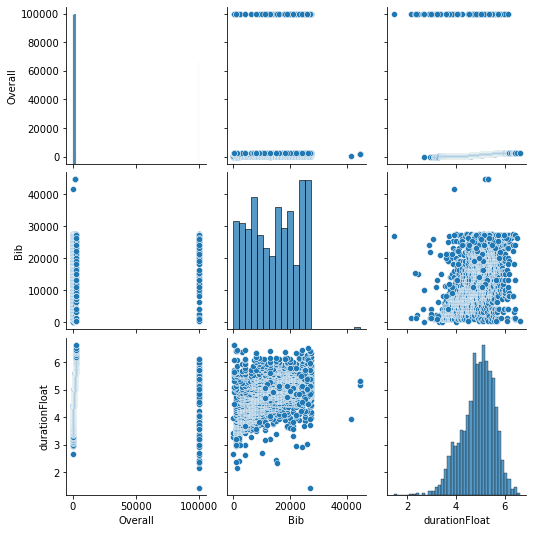

In [475]:
sns.pairplot(final_2018_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bib', ylabel='durationFloat'>

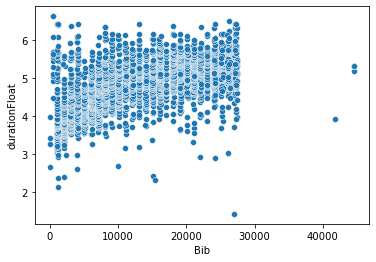

In [476]:
sns.scatterplot("Bib","durationFloat",data=final_2018_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='durationFloat'>

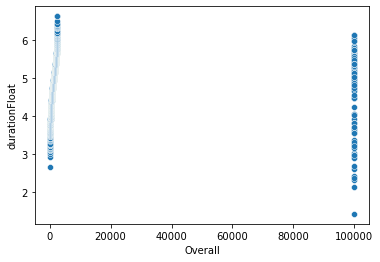

In [477]:
sns.scatterplot("Overall","durationFloat",data=final_2018_half)

In [478]:
final_2018_half.describe()

,Overall,Bib,durationFloat
count,2595.000000,2595.000000,2595.000000
mean,6143.230058,14502.085164,4.888408
std,21481.757258,8403.911601,0.671667
min,1.000000,1.000000,1.430000
25%,649.500000,7104.500000,4.470000
50%,1298.000000,15017.000000,4.970000
75%,1946.500000,22055.500000,5.370000
max,99999.000000,44562.000000,6.630000


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

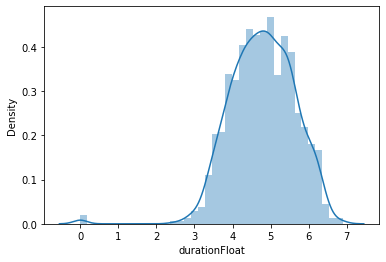

In [479]:
sns.distplot(half_2018["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

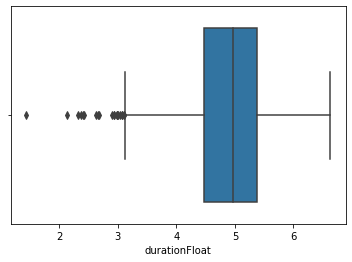

In [480]:
sns.boxplot(x="durationFloat",data=final_2018_half)

<AxesSubplot:xlabel='durationFloat'>

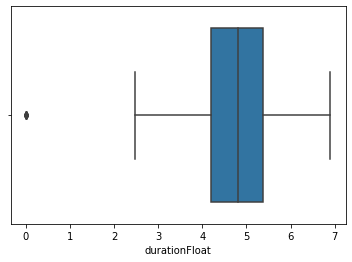

In [481]:
sns.boxplot(x="durationFloat",data=half_2018)

In [141]:
##2019_Half-Marathon EDA

In [482]:
half_2019 = marathon(urlbase_2019, pgs_2019)
half_2019.shape

(2811, 4)

In [143]:
half_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Overall  2811 non-null   int64 
 1   Bib      2811 non-null   int64 
 2   Name     2811 non-null   object
 3   Time     2811 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.0+ KB


In [144]:
half_2019.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09


In [483]:
half_2019["Time"]= pd.to_datetime(half_2019["Time"])

In [484]:
half_2019['durationFloat'] =half_2019['Time'].dt.hour.astype(float) + round(half_2019['Time'].dt.minute/60, 2)


In [485]:
slowest_2019 = half_2019.loc[half_2019["durationFloat"] == half_2019["durationFloat"].min()]


In [486]:
final_2019_half = half_2019.drop(slowest_2019.index)


In [487]:
winner = final_2019_half.loc[final_2019_half["durationFloat"]==final_2019_half["durationFloat"].min()]
winner

,Overall,Bib,Name,Time,durationFloat
0,1,30001,Travis Peruski,2020-11-24 01:37:54,1.62


In [488]:
half_2019.head()

,Overall,Bib,Name,Time,durationFloat
0,1,30001,Travis Peruski,2020-11-24 01:37:54,1.62
1,2,1,Scott Wietecha,2020-11-24 02:34:59,2.57
2,3,4,Jordan Wilson,2020-11-24 02:35:24,2.58
3,4,30034,Steelton Flynn,2020-11-24 02:39:59,2.65
4,5,30035,Thomas Ellis,2020-11-24 02:42:09,2.70


In [489]:
half_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Overall        2811 non-null   int64         
 1   Bib            2811 non-null   int64         
 2   Name           2811 non-null   object        
 3   Time           2811 non-null   datetime64[ns]
 4   durationFloat  2811 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 109.9+ KB


In [490]:
half_2019["Time"].max()

Timestamp('2020-11-24 06:43:55')

In [491]:
import seaborn as sns

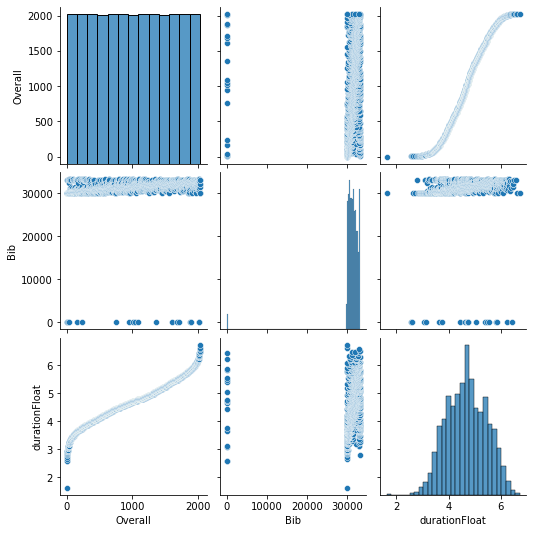

In [492]:
sns.pairplot(final_2019_half)

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall', ylabel='durationFloat'>

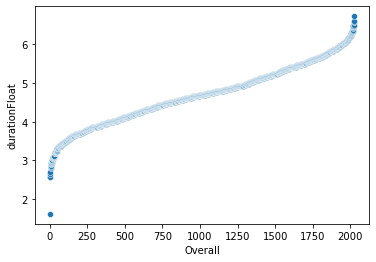

In [497]:
sns.scatterplot("Overall","durationFloat",data=final_2019_half)

In [498]:
final_2019_half.describe()

,Overall,Bib,durationFloat
count,2025.000000,2025.000000,2025.000000
mean,1013.000000,31239.138765,4.692889
std,584.711467,3166.606555,0.757886
min,1.000000,1.000000,1.620000
25%,507.000000,30722.000000,4.120000
50%,1013.000000,31470.000000,4.680000
75%,1519.000000,32256.000000,5.250000
max,2025.000000,33218.000000,6.720000


C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

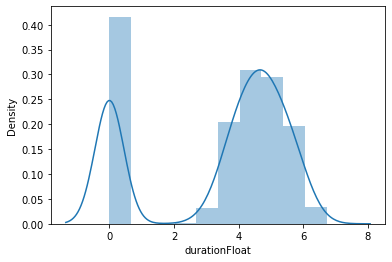

In [499]:
sns.distplot(half_2019["durationFloat"])

C:\Users\abcar\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='durationFloat', ylabel='Density'>

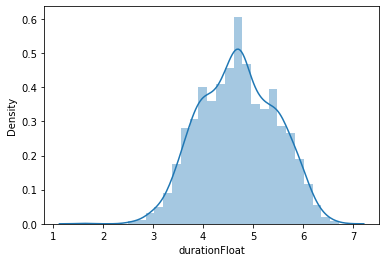

In [500]:
sns.distplot(final_2019_half["durationFloat"])

<AxesSubplot:xlabel='durationFloat'>

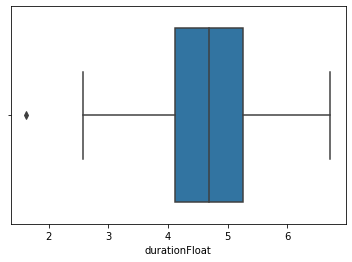

In [501]:
sns.boxplot(x="durationFloat",data=final_2019_half)

<AxesSubplot:xlabel='durationFloat'>

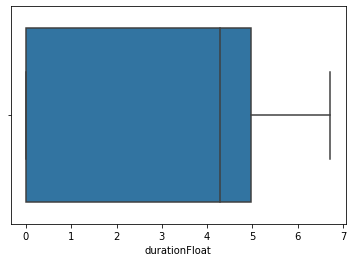

In [502]:
sns.boxplot(x="durationFloat",data=half_2019)

In [503]:
final_2019_half.loc[final_2019_half["Bib"] == 1]

,Overall,Bib,Name,Time,durationFloat
1,2,1,Scott Wietecha,02:34:59,2.57


Making a new column called Year then Merge tables

In [504]:
final_2016_full['Year']=2016

In [505]:
final_2016_full.head()

,Overall,Bib,Name,Time,durationFloat,Year
0,1,1,Scott Wietecha,2020-11-23 02:25:42,2.42,2016
1,2,3,Brian Shelton,2020-11-23 02:34:43,2.57,2016
2,3,1047,Christopher Capps,2020-11-23 02:38:43,2.63,2016
3,4,1052,Jason Grimes,2020-11-23 02:45:06,2.75,2016
4,5,1046,David Adams,2020-11-23 02:47:28,2.78,2016


In [506]:
final_2017_full['Year']=2017

In [507]:
final_2017_full.head()

,Overall,Bib,Name,Time,durationFloat,Year
0,1,1,Scott Wietecha,2020-11-23 02:40:25,2.67,2017
1,2,1145,Ryan Regnier,2020-11-23 02:56:28,2.93,2017
2,3,1147,Daniel Everett,2020-11-23 03:00:55,3.00,2017
3,4,1029,Khris Vickroy,2020-11-23 03:04:47,3.07,2017
4,5,1119,Marcus Dilallo,2020-11-23 03:04:53,3.07,2017


In [508]:
final_2018_full['Year']=2018

In [509]:
final_2018_full.head()

,Overall,Bib,Name,Time,durationFloat,Year
0,1,1,Scott Wietecha,2020-11-23 02:28:16,2.47,2018
1,2,3,Garang Madut,2020-11-23 02:29:52,2.48,2018
2,3,33442,Kevin Fink,2020-11-23 02:38:59,2.63,2018
3,4,33441,Andrew Hodges,2020-11-23 02:43:59,2.72,2018
4,5,30028,Nicholas Aubert,2020-11-23 02:48:11,2.80,2018


In [511]:
final_2019_full['Year']=2019

In [512]:
final_2019_full.head()

,Overall,Bib,Name,Time,durationFloat,Year
0,1,30001,Travis Peruski,2020-11-23 01:37:54,1.62,2019
1,2,1,Scott Wietecha,2020-11-23 02:34:59,2.57,2019
2,3,4,Jordan Wilson,2020-11-23 02:35:24,2.58,2019
3,4,30034,Steelton Flynn,2020-11-23 02:39:59,2.65,2019
4,5,30035,Thomas Ellis,2020-11-23 02:42:09,2.70,2019


In [514]:
full_marathon =pd.concat([final_2016_full,final_2017_full,final_2018_full,final_2019_full], ignore_index=True, sort=True)


In [515]:
full_marathon.head()

,Bib,Name,Overall,Time,Year,durationFloat
0,1,Scott Wietecha,1,2020-11-23 02:25:42,2016,2.42
1,3,Brian Shelton,2,2020-11-23 02:34:43,2016,2.57
2,1047,Christopher Capps,3,2020-11-23 02:38:43,2016,2.63
3,1052,Jason Grimes,4,2020-11-23 02:45:06,2016,2.75
4,1046,David Adams,5,2020-11-23 02:47:28,2016,2.78


In [516]:
full_marathon.loc[full_marathon["Bib"] == 1]

,Bib,Name,Overall,Time,Year,durationFloat
0,1,Scott Wietecha,1,2020-11-23 02:25:42,2016,2.42
2978,1,Scott Wietecha,1,2020-11-23 02:40:25,2017,2.67
5573,1,Scott Wietecha,1,2020-11-23 02:28:16,2018,2.47
7681,1,Scott Wietecha,2,2020-11-23 02:34:59,2019,2.57


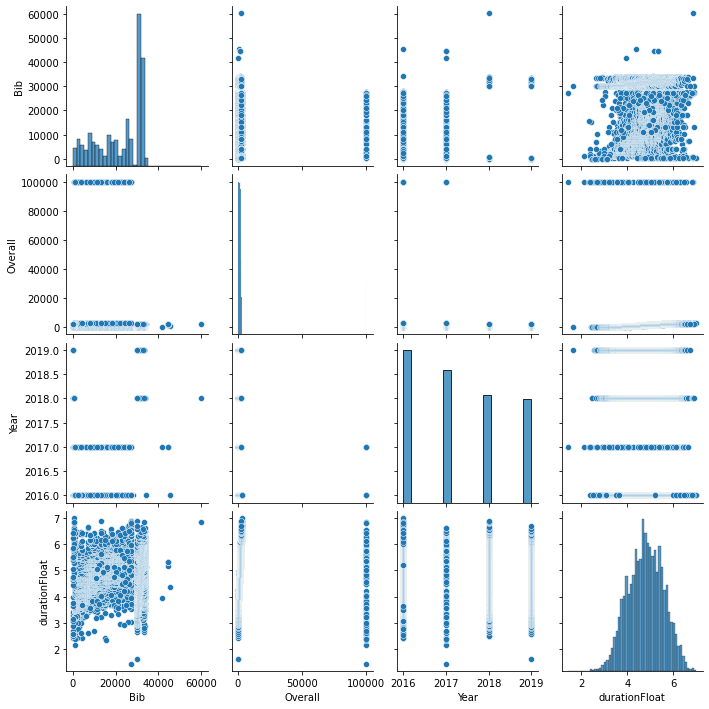

In [517]:
sns.pairplot(full_marathon)

In [518]:
full_marathon.describe()

,Bib,Overall,Year,durationFloat
count,9705.000000,9705.000000,9705.000000,9705.000000
mean,21933.816692,2800.848429,2017.327563,4.799344
std,10573.284349,12405.240315,1.118664,0.763095
min,1.000000,1.000000,2016.000000,1.430000
25%,12134.000000,608.000000,2016.000000,4.250000
50%,26059.000000,1214.000000,2017.000000,4.820000
75%,31295.000000,1821.000000,2018.000000,5.370000
max,60042.000000,99999.000000,2019.000000,7.000000


Winners of the Full and Half Marathon




In [519]:
# finding the pace of the best time and worst time (the formula I  will be using is s = vt where s is the distance, v is velocity and t is time so then  v
mintime = full_marathon['durationFloat'].min()
mintime

1.43

In [522]:
distance_full = 26 #in miles
speed = distance_full/mintime
print("Best time for nashville full marathon is "+str(mintime)+" and the runner ran with the speed of "+str(round(speed,2))+" miles/hour")

Best time for nashville full marathon is 1.43 and the runner ran with the speed of 18.18 miles/hour


In [525]:
final_2016_half['Year']=2016

In [526]:
final_2017_half['Year']=2017

In [527]:
final_2018_half['Year']=2018

In [528]:
final_2019_half['Year']=2019

In [529]:
final_2016_half.head()

,Overall,Bib,Name,Time,durationFloat,Year
0,1,1,Scott Wietecha,02:25:42,2.42,2016
1,2,3,Brian Shelton,02:34:43,2.57,2016
2,3,1047,Christopher Capps,02:38:43,2.63,2016
3,4,1052,Jason Grimes,02:45:06,2.75,2016
4,5,1046,David Adams,02:47:28,2.78,2016


In [530]:
half_marathon =pd.concat([final_2016_half,final_2017_half,final_2018_half,final_2019_half], ignore_index=True, sort=True)


In [531]:
half_marathon.head()

,Bib,Name,Overall,Time,Year,durationFloat
0,1,Scott Wietecha,1,02:25:42,2016,2.42
1,3,Brian Shelton,2,02:34:43,2016,2.57
2,1047,Christopher Capps,3,02:38:43,2016,2.63
3,1052,Jason Grimes,4,02:45:06,2016,2.75
4,1046,David Adams,5,02:47:28,2016,2.78


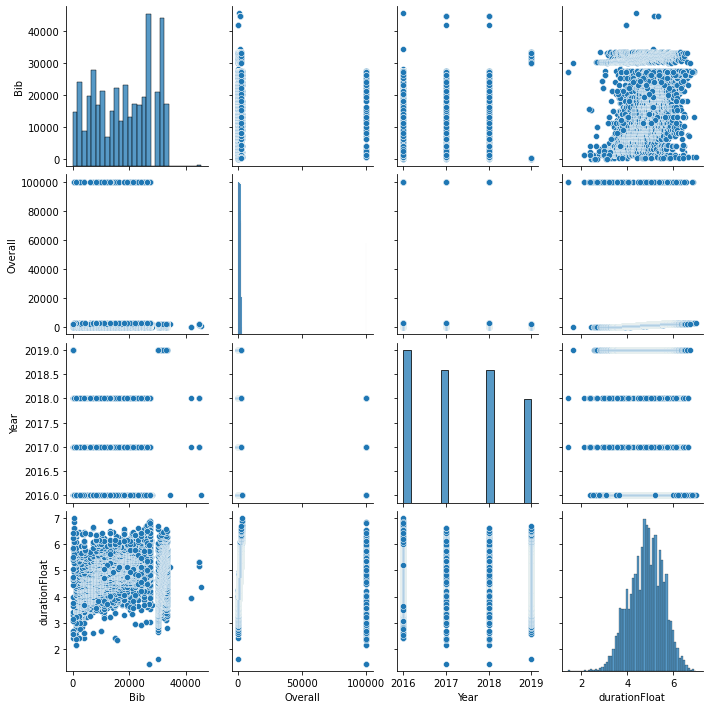

In [532]:
sns.pairplot(half_marathon)

In [533]:
half_marathon.describe()

,Bib,Overall,Year,durationFloat
count,10193.000000,10193.000000,10193.000000,10193.000000
mean,18061.591779,4012.898852,2017.359757,4.820878
std,10118.134574,16267.716998,1.100956,0.735281
min,1.000000,1.000000,2016.000000,1.430000
25%,9001.000000,638.000000,2016.000000,4.320000
50%,19017.000000,1275.000000,2017.000000,4.850000
75%,27006.000000,1913.000000,2018.000000,5.370000
max,45340.000000,99999.000000,2019.000000,7.000000
